In [1]:
from utils import load_chars_dataset, show_image, load_detection_images, get_label
import numpy as np
import matplotlib.pyplot as plt
import torch
import matplotlib.pyplot as plt
torch.random.manual_seed(0)
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
X, y = load_chars_dataset()

(14224, 400) (400,)


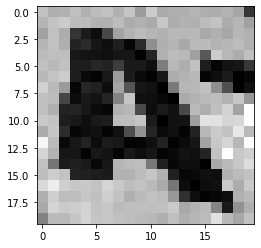

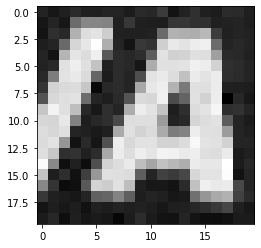

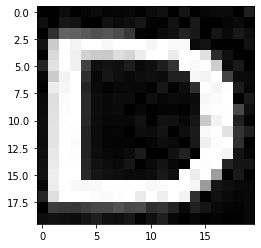

a a d


In [3]:
#i print some images

print(X.shape, X[0].shape)

show_image(X[0])
plt.show()
show_image(X[800])
plt.show()
show_image(X[2500])
plt.show()

#these are their correct labels


print(get_label(y[0]), get_label(y[800]), get_label(y[2500]))


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
neigh = KNeighborsClassifier(n_neighbors=4)
neigh.fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.7493848857644991


In [6]:
nn = MLPClassifier(
    hidden_layer_sizes=(400),
    max_iter=500
)
nn.fit(X_train, y_train)
nn.score(X_test, y_test)


0.8927943760984183

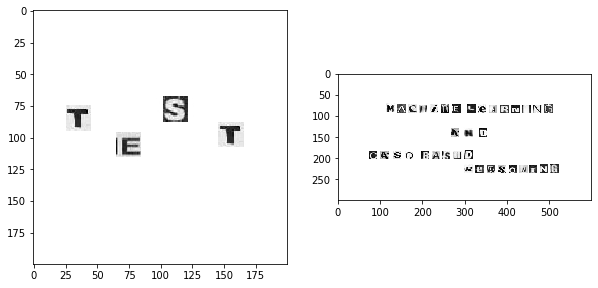

In [7]:
detection_1, detection_2 = load_detection_images()

plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.imshow(detection_1, cmap="gray")

plt.subplot(1,2,2)
plt.imshow(detection_2, cmap="gray")


In [61]:
def is_object_too_close(i, j, char_coordinates):
    for coords in char_coordinates:
        c_i = coords[0]
        c_j = coords[1]
        if abs(c_i - i) <= 20 and abs(c_j - j) <= 20:
            return True
    return False

def detect_objects(img):
    """
    Finds the letters in the images and puts them and their images in dictionary
    """
    #size of window
    window_size = 20
    #indices were letters start
    char_coordinates = []
    
    img_H, img_W = img.shape
    #iterate over widht and height of image
    for i in range(img_H - window_size):
        for j in range(img_W - window_size):
            if is_object_too_close(i, j, char_coordinates):
                continue
            
            #create window of size of images that we classify
            window = img[i:i+window_size, j:j+window_size].flatten()
            #normalize pixels in image
            window = window = window / np.linalg.norm(window)
            window = np.array([window])
            #perform prediction of contents of image
            prediction = nn.predict_proba(window)
            #Check if the model is confident it has found a letter
            if np.max(prediction) > 0.9999:
                l = get_label(np.argmax(prediction))
                char_coordinates.append((i,j))
                        
                
    return objects
    

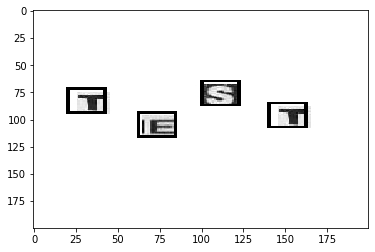

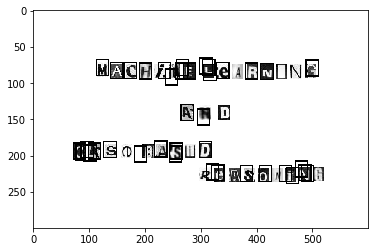

In [63]:
def draw_rectangles_around_letters(img, letter_coordinates):
    """
    params:
    img: 2D numpy array image
    letter_coordinates: list of coordinates for objects found
    returns:
    a copy of the image with boxes around letters
    """
    img = np.copy(img)
    #iterate over letters found
    for l in letter_coordinates:
        #iterate iver coordinates where the letters were found
        for coord in letter_coordinates[l]:
            i = coord[0]
            j = coord[1]
            #create border around letter
            border = img[i:i+20, j:j+20]
            border = np.pad(border, ((2,2),(2,2)), 'constant')
            img[i-2:i+22, j-2:j+22] = border
    
    return img

#result of performing object detection with the coordinates
img_1 = draw_rectangles_around_letters(detection_1, img_1_objects)
img_2 = draw_rectangles_around_letters(detection_2, img_2_objects)


plt.imshow(img_1, cmap="gray", aspect="auto")
plt.show()

plt.imshow(img_2, cmap="gray", aspect="auto")

t


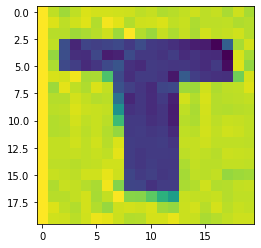

In [31]:
"""
example of taking a window from the image and performing classification on it
"""
window = detection_1[75:95, 25:45]
plt.imshow(window)
window = window.flatten()
window = window = window / np.linalg.norm(window)
window = np.array([window])
l = nn.predict(window)
print(get_label(l[0]))
